In [1]:
%matplotlib inline
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

In [105]:
img = cv2.imread('Test_Images/Lena.tiff')
img.shape

(512, 512, 3)

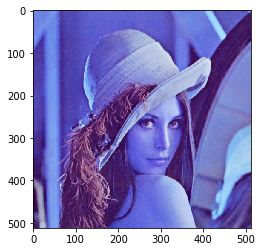

In [109]:
plt.imshow(img)

In [111]:
grayImg = np.zeros((img.shape[0], img.shape[1]))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        grayImg[i][j] = round((int(img[i][j][0]) + int(img[i][j][1]) + int(img[i][j][2]))/3)

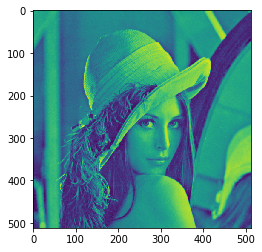

In [112]:
plt.imshow(grayImg)

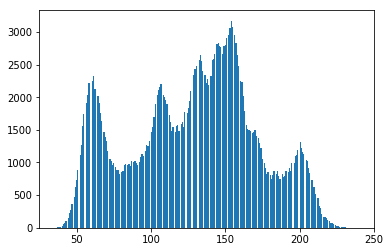

In [113]:
plt.hist(grayImg.ravel(),256)
plt.show()

In [134]:
V, bgColor = np.unique(grayImg)[:-1], np.unique(grayImg)[-1:][0]
eqClass = np.ones(grayImg.shape)
eqClass = -eqClass
A = np.random.uniform(low=0, high=255, size=(V.shape))

In [117]:
def adj8(i,j):
    for k in range(len(V)):
        if i - 1 >= 0 and j - 1 >= 0:
            if grayImg[i][j - 1] == V[k] and grayImg[i - 1][j - 1] == V[k] and grayImg[i - 1][j] == V[k]:
                eqClass[i][j] = k
            else:
                eqClass[i][j] = bgColor
        else:
            eqClass[i][j] = bgColor

In [118]:
for i in range(grayImg.shape[0]):
    for j in range(grayImg.shape[1]):
        if grayImg[i][j] in V:
            adj8(i,j)

In [133]:
newImg = copy.deepcopy(grayImg)
for i in range(grayImg.shape[0]):
    for j in range(grayImg.shape[1]):
        if eqClass[i][j] != -1:
            newImg[i][j] = A[V.index(grayImg[i][j])]
newImg

array([[163., 163., 164., ..., 167., 154., 130.],
       [163., 163., 164., ..., 167., 154., 130.],
       [163., 163., 164., ..., 167., 154., 130.],
       ...,
       [ 54.,  54.,  59., ..., 110., 105., 106.],
       [ 54.,  54.,  63., ..., 109., 111., 113.],
       [ 54.,  54.,  63., ..., 109., 111., 113.]])

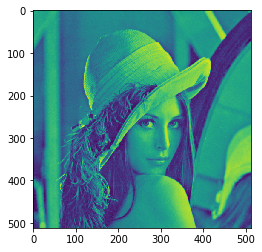

In [132]:
plt.imshow(newImg)

In [135]:
newImg == grayImg

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])